In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Vertebral_column_3C.dat',sep=' ',header=None,names=['Pelvic Incidence','pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis','Label'],encoding='utf-8')
df.tail()

,Pelvic Incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Label
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO


In [3]:
#Due to umbalanced class labels, I am undersampling the abnormal labels to match that of normal labels

abnormal = df[df.Label != 'NO']
normal = df[df.Label == "NO"]
print(f'Number of abnormal = {len(abnormal)} and number of normal = {len(normal)}')
#undersampling for abnormal to match number of normal
undersampled_abnormal = abnormal.sample(len(normal),random_state=101)
print(f'Undersampled abnormal = {len(undersampled_abnormal)}')
#concat both dataframes
concat_df = pd.concat([undersampled_abnormal,normal])

undersampled_y = concat_df.iloc[:,6].values
undersampled_y_arr = np.where(undersampled_y == "NO",0,1)

undersampled_independent_variables = concat_df.drop(labels=['Label'],axis=1)
undersampled_independent_variables.shape


Number of abnormal = 210 and number of normal = 100
Undersampled abnormal = 100


(200, 6)

Divide the data in the file Vertebral column 3C.dat into a training set and a test set, and do the following:
(a) Select two features and train a decision tree, calculate prediction accuracy and plot the decision regions.
(b) Use all features to train a decision tree and calculate prediction accuracy.

In [4]:
from sklearn.model_selection import train_test_split
undersampled_two_features = undersampled_independent_variables[['pelvic tilt','Pelvic Incidence']]
xtrain,xtest,ytrain,ytest = train_test_split(undersampled_two_features,undersampled_y_arr,test_size=0.3,random_state=4,stratify=undersampled_y_arr)
print('Labels counts in y:', np.bincount(undersampled_y_arr))
print('Labels counts in y_train:', np.bincount(ytrain))
print('Labels counts in y_test:', np.bincount(ytest))

Labels counts in y: [100 100]
Labels counts in y_train: [70 70]
Labels counts in y_test: [30 30]


In [5]:
from sklearn.metrics import accuracy_score
from sklearn import tree

first_tree_model = tree.DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
first_tree_model.fit(xtrain, ytrain)
first_y_pred = first_tree_model.predict(xtest)
print('Misclassified examples: %d' % (ytest != first_y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(ytest, first_y_pred))


Misclassified examples: 20
Accuracy: 0.6667


In [6]:
#import sys
#!{sys.executable} -m pip install mlxtend
from mlxtend.plotting import plot_decision_regions


/Users/richardmorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


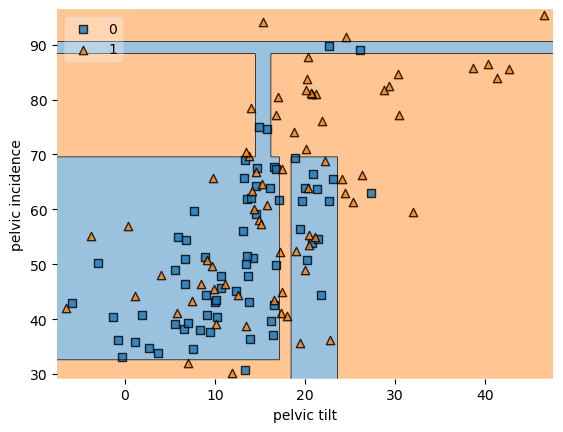

In [7]:
plot_decision_regions(xtrain.to_numpy(), ytrain, clf=first_tree_model, legend=2)
plt.xlabel('pelvic tilt')
plt.ylabel('pelvic incidence')
plt.show()

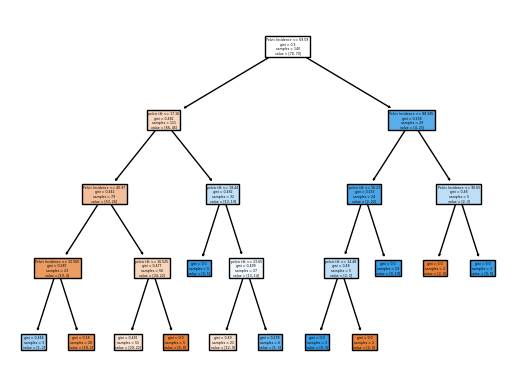

In [8]:
feature_names=['pelvic tilt', 'Pelvic Incidence']
tree.plot_tree(first_tree_model,feature_names=feature_names,filled=True)
plt.show()

In [9]:
#All features
y = df.iloc[:,6].values
y = np.where(y == "NO",0,1)

independent_variables = df.drop(labels=['Label'],axis=1)


X_train,X_test,Y_train,Y_test = train_test_split(independent_variables,y,test_size=0.3,random_state=1,stratify=y)

#stratify=y enables stratification: returns training and test subsets that have the
#same proportions of class labels as the input dataset.
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(Y_train))
print('Labels counts in y_test:', np.bincount(Y_test))

Labels counts in y: [100 210]
Labels counts in y_train: [ 70 147]
Labels counts in y_test: [30 63]


In [10]:
from sklearn.metrics import accuracy_score
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, Y_train)
y_pred = tree_model.predict(X_test)
print('Misclassified examples: %d' % (Y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred))

Misclassified examples: 21
Accuracy: 0.7742


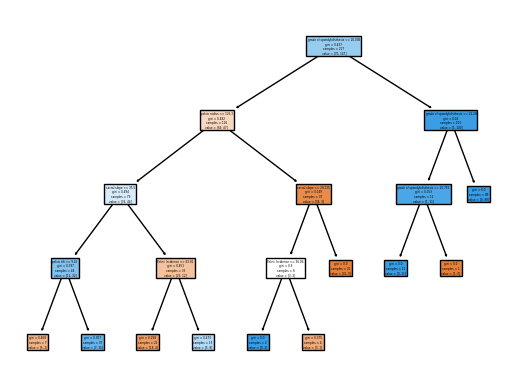

In [11]:
features = independent_variables.columns.values
tree.plot_tree(tree_model,feature_names=features,filled=True)
plt.show()

2. Divide the data in the file Vertebral column 3C.dat into a training set (30%) and test set
(30%), and do the following.
(a) Train a SVM: use ten-fold cross validation to choose the optimal value of C and the
optimal kernel, and calculate the prediction accuracy.
(b) Train a decision tree: use ten-fold cross validation to choose the optimal value of the
depth of the tree and calculate the prediction accuracy.

In [12]:
#creating copy of original dataset for use in SVM
svm_data = df.copy()

#grab everything except the label column
x = svm_data.drop(labels=['Label'],axis=1)

#convert labels to 0's and 1's
y = svm_data.iloc[:,6].values
y = np.where(y=="NO",0,1)


In [13]:
#split data into test and train sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,stratify=y)

In [14]:
#train a svm model and use 10 fold cross validation
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0.5,1,10,100],
    'kernel':['rbf','poly','sigmoid','linear']
}

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=10,
        scoring='accuracy',
        verbose=0,
)
optimal_params.fit(xtrain,ytrain)
print(f'Optimal parameters = {optimal_params.best_params_}, Accuracy = {optimal_params.best_score_}')

Optimal parameters = {'C': 10, 'kernel': 'poly'}, Accuracy = 0.8891774891774892


In [15]:
#optimal decision tree
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,4),
}

optimal_params_tree = GridSearchCV(
        tree.DecisionTreeClassifier(),
        param_grid,
        cv=10,
        scoring='accuracy',
        verbose=0,
)
optimal_params_tree.fit(xtrain,ytrain)
print(f'Optimal paramaters = {optimal_params_tree.best_params_}, Accuracy = {optimal_params_tree.best_score_}')


Optimal paramaters = {'criterion': 'gini', 'max_depth': 2}, Accuracy = 0.8287878787878787


3.The data set Vertebral column 3C.dat contains three classes. Combine DH and SL classes
into one abnormal class, divide the data into a training set (30%) and test set (30%), and do
the following.
(a) Train a logistic regression model with `2-regularization: use ten-fold cross validation
to choose the optimal value of the regularization parameter, plot the confusion matrix,
calculate sensitivity and specificity, plot the ROC curve, and calculate AUC.
(b) Train a decision tree: use ten-fold cross validation to choose the optimal value of the
depth of the tree, plot the confusion matrix, calculate recall and precision, plot the
precision-recall curve, and calculate AUC.

In [16]:
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(independent_variables,y,test_size=0.3,train_size=0.3,random_state=1,stratify=y)

from sklearn.linear_model import LogisticRegression

#optimal logistis regression params
param_grid = {
    'solver':['newton-cg','lbfgs'],
    'C':np.logspace(-3,3,7),
    'penalty':['l2']
}
optimal_params_lr = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
optimal_params_lr.fit(X_train,Y_train)

print(f'Optimal paramaters = {optimal_params_lr.best_params_}, Accuracy = {optimal_params_lr.best_score_}')


Optimal paramaters = {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}, Accuracy = 0.8733333333333334


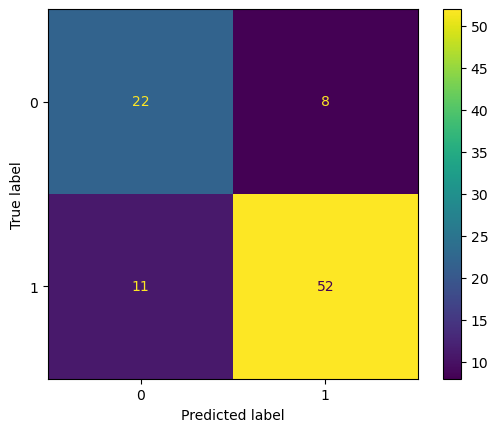

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = optimal_params_lr.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
plt.show()

In [18]:
from sklearn.metrics import recall_score
print(f'Sensitivity = {recall_score(Y_test,y_pred)}')

Sensitivity = 0.8253968253968254


In [19]:
print(f'Specificity = {recall_score(np.logical_not(Y_test),np.logical_not(y_pred))}')

Specificity = 0.7333333333333333


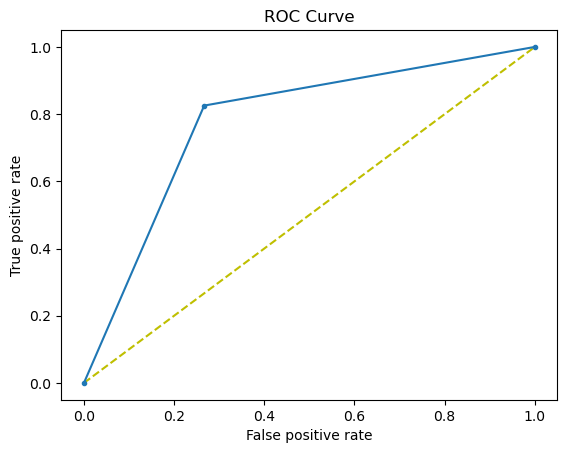

AUC = 0.7793650793650794


In [20]:
from sklearn.metrics import roc_auc_score,roc_curve

fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Curve")
plt.show()
print(f'AUC = {roc_auc_score(Y_test,y_pred)}')

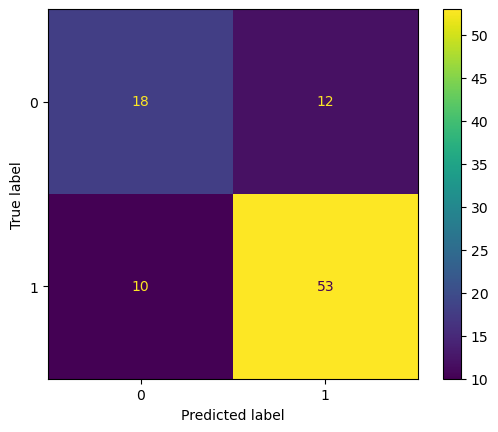

In [21]:
#optimal tree was already computed in question 2
y_tree_pred = optimal_params_tree.predict(xtest)
ConfusionMatrixDisplay.from_predictions(ytest,y_tree_pred)
plt.show()

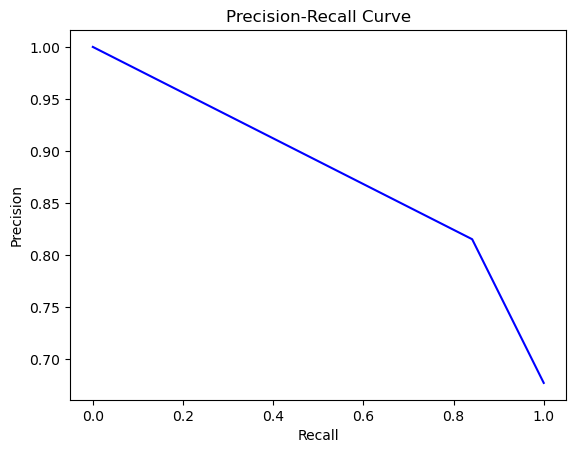

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(ytest,y_tree_pred)

fig,ax = plt.subplots()
ax.plot(recall,precision,color='blue')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()


In [23]:
from sklearn.metrics import precision_score
print(f'Precision = {precision_score(ytest,y_tree_pred)}')
print(f'Recall = {recall_score(ytest,y_tree_pred)}')


Precision = 0.8153846153846154
Recall = 0.8412698412698413


In [24]:
print(f'AUC = {roc_auc_score(ytest,y_tree_pred)}')

AUC = 0.7206349206349207
